# Evasão dos clientes TelecomX

In [74]:
import pandas as pd
from pandas import json_normalize

In [75]:
df = pd.read_csv('/content/dados_transformados.csv')
df.head()

,ID_Cliente,Cancelamento,Gênero,Idoso,Possui_Companheiro,Possui_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,internet/streamingtv,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Valor_Mensal,Valor_Total
0,0002-orfbo,0,feminino,0,1,1,9,1,NaN,dsl,...,NaN,NaN,NaN,NaN,NaN,anual,1,cheque,65.6,593.30
1,0003-mknfe,0,masculino,0,0,0,9,1,NaN,dsl,...,NaN,NaN,NaN,NaN,NaN,mensal,0,cheque,59.9,542.40
2,0004-tlhlj,1,masculino,0,0,0,4,1,NaN,fibra óptica,...,NaN,NaN,NaN,NaN,NaN,mensal,1,cheque eletrônico,73.9,280.85
3,0011-igkff,1,masculino,1,1,0,13,1,NaN,fibra óptica,...,NaN,NaN,NaN,NaN,NaN,mensal,1,cheque eletrônico,98.0,1237.85
4,0013-exchz,1,feminino,1,1,0,3,1,NaN,fibra óptica,...,NaN,NaN,NaN,NaN,NaN,mensal,1,cheque,83.9,267.40


In [76]:
df.columns

Index(['ID_Cliente', 'Cancelamento', 'Gênero', 'Idoso', 'Possui_Companheiro',
       'Possui_Dependentes', 'Meses_de_Contrato', 'Telefone_Ativo',
       'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'internet/streamingtv', 'Streaming_Filmes', 'Tipo_Contrato',
       'Fatura_Digital', 'Forma_Pagamento', 'Valor_Mensal', 'Valor_Total'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Cancelamento          7043 non-null   int64  
 2   Gênero                7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Possui_Companheiro    7043 non-null   int64  
 5   Possui_Dependentes    7043 non-null   int64  
 6   Meses_de_Contrato     7043 non-null   int64  
 7   Telefone_Ativo        7043 non-null   int64  
 8   Multiplas_Linhas      682 non-null    object 
 9   Tipo_Internet         5517 non-null   object 
 10  Seguranca_Online      1526 non-null   object 
 11  Backup_Online         1526 non-null   object 
 12  Protecao_Dispositivo  1526 non-null   object 
 13  Suporte_Tecnico       1526 non-null   object 
 14  internet/streamingtv  1526 non-null   object 
 15  Streaming_Filmes     

In [78]:
df.apply(lambda x: x.unique())

,0
ID_Cliente,"[0002-orfbo, 0003-mknfe, 0004-tlhlj, 0011-igkf..."
Cancelamento,"[0, 1]"
Gênero,"[feminino, masculino]"
Idoso,"[0, 1]"
Possui_Companheiro,"[1, 0]"
Possui_Dependentes,"[1, 0]"
Meses_de_Contrato,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
Telefone_Ativo,"[1, 0]"
Multiplas_Linhas,"[nan, sem serviço telefônico]"
Tipo_Internet,"[dsl, fibra óptica, nan]"


In [79]:
print(df.columns.tolist())

['ID_Cliente', 'Cancelamento', 'Gênero', 'Idoso', 'Possui_Companheiro', 'Possui_Dependentes', 'Meses_de_Contrato', 'Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'internet/streamingtv', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Forma_Pagamento', 'Valor_Mensal', 'Valor_Total']


In [80]:
colunas = [
    "Seguranca_Online",
    "Backup_Online",
    "Protecao_Dispositivo",
    "Suporte_Tecnico",
    "internet/streamingtv",
    "Streaming_Filmes"
]
df[colunas] = df[colunas].replace("Sem internet", "Não")

In [81]:
df.apply(lambda x: x.unique())

,0
ID_Cliente,"[0002-orfbo, 0003-mknfe, 0004-tlhlj, 0011-igkf..."
Cancelamento,"[0, 1]"
Gênero,"[feminino, masculino]"
Idoso,"[0, 1]"
Possui_Companheiro,"[1, 0]"
Possui_Dependentes,"[1, 0]"
Meses_de_Contrato,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
Telefone_Ativo,"[1, 0]"
Multiplas_Linhas,"[nan, sem serviço telefônico]"
Tipo_Internet,"[dsl, fibra óptica, nan]"


In [82]:
colunas = ["Multiplas_Linhas"]

df[colunas] = df[colunas].replace("Sem telefone", "Não")

In [83]:
print(df.columns.tolist())

['ID_Cliente', 'Cancelamento', 'Gênero', 'Idoso', 'Possui_Companheiro', 'Possui_Dependentes', 'Meses_de_Contrato', 'Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'internet/streamingtv', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Forma_Pagamento', 'Valor_Mensal', 'Valor_Total']


In [84]:
df_clean = df.copy()

categorical_cols = [
      'Cancelamento', 'Gênero', 'Possui_Companheiro',
      'Possui_Dependentes', 'Telefone_Ativo',
      'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
      'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
      'internet/streamingtv', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
      'Forma_Pagamento'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded

,ID_Cliente,Idoso,Meses_de_Contrato,Valor_Mensal,Valor_Total,Cancelamento_1,Gênero_masculino,Possui_Companheiro_1,Possui_Dependentes_1,Telefone_Ativo_1,Tipo_Internet_fibra óptica,Tipo_Contrato_bienal,Tipo_Contrato_mensal,Fatura_Digital_1,Forma_Pagamento_cheque,Forma_Pagamento_cheque eletrônico,Forma_Pagamento_transferência bancária automática
0,0002-orfbo,0,9,65.60,593.30,False,False,True,True,True,False,False,False,True,True,False,False
1,0003-mknfe,0,9,59.90,542.40,False,True,False,False,True,False,False,True,False,True,False,False
2,0004-tlhlj,0,4,73.90,280.85,True,True,False,False,True,True,False,True,True,False,True,False
3,0011-igkff,1,13,98.00,1237.85,True,True,True,False,True,True,False,True,True,False,True,False
4,0013-exchz,1,3,83.90,267.40,True,False,True,False,True,True,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-lutyd,0,13,55.15,742.90,False,False,False,False,True,False,False,False,False,True,False,False
7039,9992-rramn,0,22,85.10,1873.70,True,True,True,False,True,True,False,True,True,False,True,False
7040,9992-ujoel,0,2,50.30,92.75,False,True,False,False,True,False,False,True,True,True,False,False
7041,9993-lhieb,0,67,67.85,4627.65,False,True,True,True,True,False,True,False,False,True,False,False


In [85]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID_Cliente                                         7043 non-null   object 
 1   Idoso                                              7043 non-null   int64  
 2   Meses_de_Contrato                                  7043 non-null   int64  
 3   Valor_Mensal                                       7043 non-null   float64
 4   Valor_Total                                        7032 non-null   float64
 5   Cancelamento_1                                     7043 non-null   bool   
 6   Gênero_masculino                                   7043 non-null   bool   
 7   Possui_Companheiro_1                               7043 non-null   bool   
 8   Possui_Dependentes_1                               7043 non-null   bool   
 9   Telefone

In [86]:
from IPython.display import display, HTML

In [87]:
for col in df_encoded.select_dtypes(include='object').columns:
    titulo = f"➡️  {col.upper()}"
    display(HTML(titulo))
    display(df_encoded[col].value_counts(dropna=False).head(3).to_frame(name='Frequência'))
    print("-" * 35)

,Frequência
ID_Cliente,
9995-hotoh,1
0002-orfbo,1
0003-mknfe,1


-----------------------------------


In [88]:
print(df_encoded.columns.tolist())

['ID_Cliente', 'Idoso', 'Meses_de_Contrato', 'Valor_Mensal', 'Valor_Total', 'Cancelamento_1', 'Gênero_masculino', 'Possui_Companheiro_1', 'Possui_Dependentes_1', 'Telefone_Ativo_1', 'Tipo_Internet_fibra óptica', 'Tipo_Contrato_bienal', 'Tipo_Contrato_mensal', 'Fatura_Digital_1', 'Forma_Pagamento_cheque', 'Forma_Pagamento_cheque eletrônico', 'Forma_Pagamento_transferência bancária automática']


In [89]:
df_encoded['Cancelamento_1'].unique()

array([False,  True])

In [90]:
binarias = [col for col in df_encoded.columns if set(df_encoded[col].dropna().unique()).issubset({0, 1})]

df_encoded[binarias] = df_encoded[binarias].astype(bool)

df_encoded.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID_Cliente                                         7043 non-null   object 
 1   Idoso                                              7043 non-null   bool   
 2   Meses_de_Contrato                                  7043 non-null   int64  
 3   Valor_Mensal                                       7043 non-null   float64
 4   Valor_Total                                        7032 non-null   float64
 5   Cancelamento_1                                     7043 non-null   bool   
 6   Gênero_masculino                                   7043 non-null   bool   
 7   Possui_Companheiro_1                               7043 non-null   bool   
 8   Possui_Dependentes_1                               7043 non-null   bool   
 9   Telefone

In [91]:
df_encoded.isnull().sum()

,0
ID_Cliente,0
Idoso,0
Meses_de_Contrato,0
Valor_Mensal,0
Valor_Total,11
Cancelamento_1,0
Gênero_masculino,0
Possui_Companheiro_1,0
Possui_Dependentes_1,0
Telefone_Ativo_1,0


In [92]:
correlacao = dados_numericos.corr().abs()

upper = correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(bool))

pares_correlacionados = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if pd.notnull(upper.loc[row, col]) and upper.loc[row, col] > 0.95
]

print("🔁 PARES DE COLUNAS COM ALTA CORRELAÇÃO:")
print('-'*40)
for col1, col2, corr_val in pares_correlacionados:
    print(f"{col1} 🔛 {col2}  -> correlação: {corr_val:.2f}")


🔁 PARES DE COLUNAS COM ALTA CORRELAÇÃO:
----------------------------------------


In [93]:
print(df_encoded.columns.tolist())

['ID_Cliente', 'Idoso', 'Meses_de_Contrato', 'Valor_Mensal', 'Valor_Total', 'Cancelamento_1', 'Gênero_masculino', 'Possui_Companheiro_1', 'Possui_Dependentes_1', 'Telefone_Ativo_1', 'Tipo_Internet_fibra óptica', 'Tipo_Contrato_bienal', 'Tipo_Contrato_mensal', 'Fatura_Digital_1', 'Forma_Pagamento_cheque', 'Forma_Pagamento_cheque eletrônico', 'Forma_Pagamento_transferência bancária automática']


In [94]:
# Verifica valores nulos nas duas colunas
print(df_encoded[['Valor_Mensal', 'Valor_Total']].isnull().sum())

Valor_Mensal     0
Valor_Total     11
dtype: int64


## Verificação da Proporção de Evasão

/tmp/ipython-input-4135576726.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




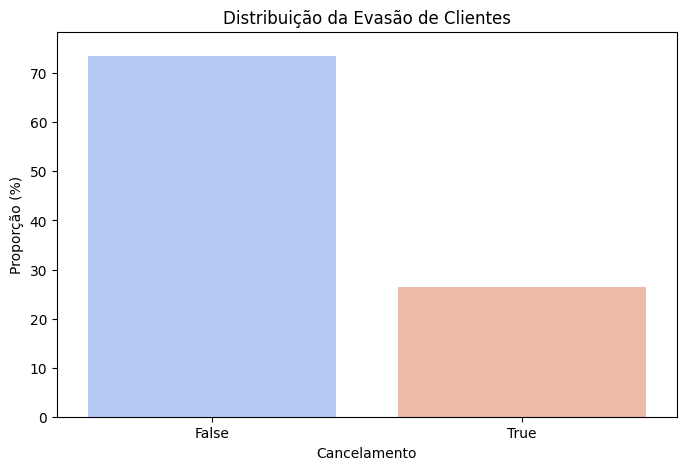


📊 FREQUÊNCIA ABSOLUTA:
-----------------------
Cancelamento_1
False    5174
True     1869
Name: count, dtype: int64
-----------------------

📈 PROPORÇÃO (%):
-----------------
Cancelamento_1
False    73.46
True     26.54
Name: proportion, dtype: float64
-----------------


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

frequencia = df_encoded['Cancelamento_1'].value_counts()
proporcao = df_encoded['Cancelamento_1'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=proporcao.index, y=proporcao.values, palette='coolwarm')
plt.ylabel('Proporção (%)')
plt.xlabel('Cancelamento')
plt.title('Distribuição da Evasão de Clientes')
plt.ylim(0, proporcao.values.max() + 5)
plt.show()

print("\n📊 FREQUÊNCIA ABSOLUTA:")
print("-" * 23)
print(frequencia)
print("-" * 23)

print("\n📈 PROPORÇÃO (%):")
print("-" * 17)
print(proporcao.round(2))
print("-" * 17)


In [96]:
df['Cancelamento'].value_counts()
dados_ativos_proporcao = (df['Cancelamento'].value_counts() / len(df)) * 100

print("Proporção de evasão de clientes:")
for index, value in dados_ativos_proporcao.items():
  print(f"{index} {value:.2f}%")

Proporção de evasão de clientes:
0 73.46%
1 26.54%


## Análise de Correlação e Separação de variáveis

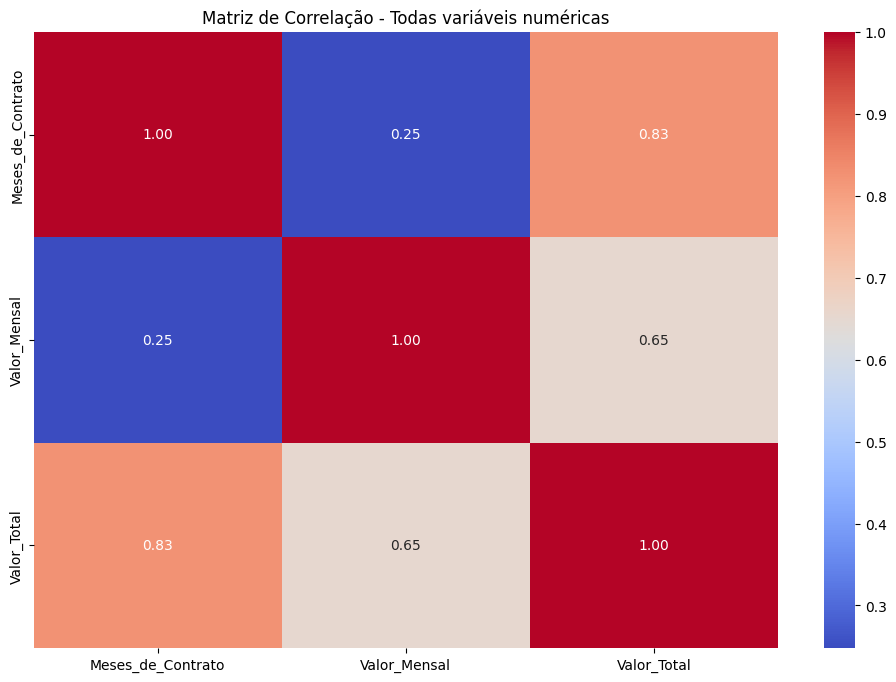

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas (inclusive Churn)
num_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Calcular correlação
corr_matrix = num_df.corr()

# Plotar heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Todas variáveis numéricas")
plt.show()

 Correlação com Churn (após separar X e y)

Valor_Mensal         0.193356
Valor_Total         -0.199484
Meses_de_Contrato   -0.352229
dtype: float64


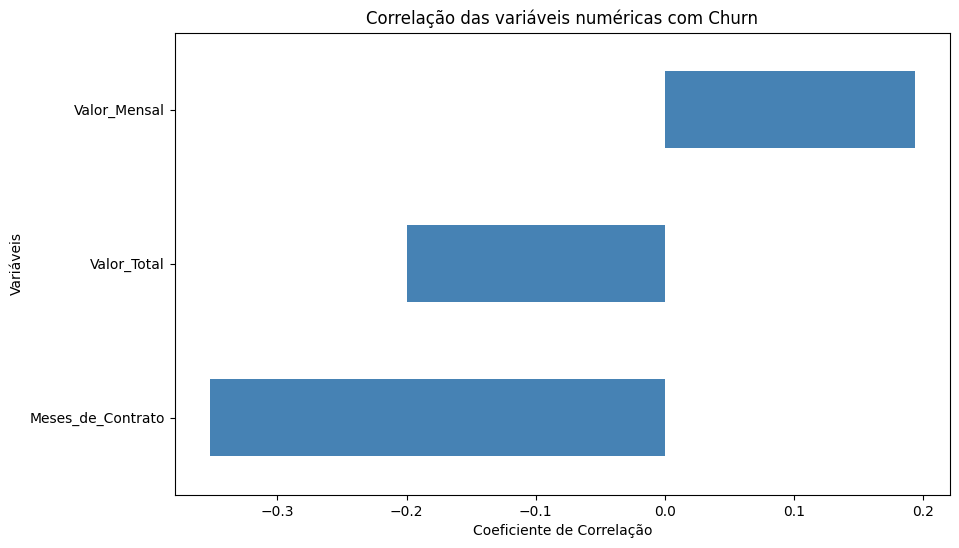

In [98]:
X = df_encoded.drop(columns=["Cancelamento_1", "ID_Cliente"])

X_num = X.select_dtypes(include=['int64', 'float64'])

corr_with_churn = X_num.corrwith(y)


print(corr_with_churn.sort_values(ascending=False))

plt.figure(figsize=(10,6))
corr_with_churn.sort_values().plot(kind='barh', color="steelblue")
plt.title("Correlação das variáveis numéricas com Churn")
plt.xlabel("Coeficiente de Correlação")
plt.ylabel("Variáveis")
plt.show()

In [99]:
correlations = df_encoded.corr(numeric_only=True)['Cancelamento_1'].abs().sort_values(ascending=False)

correlations_sorted = correlations.drop('Cancelamento_1')

/tmp/ipython-input-1041628254.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




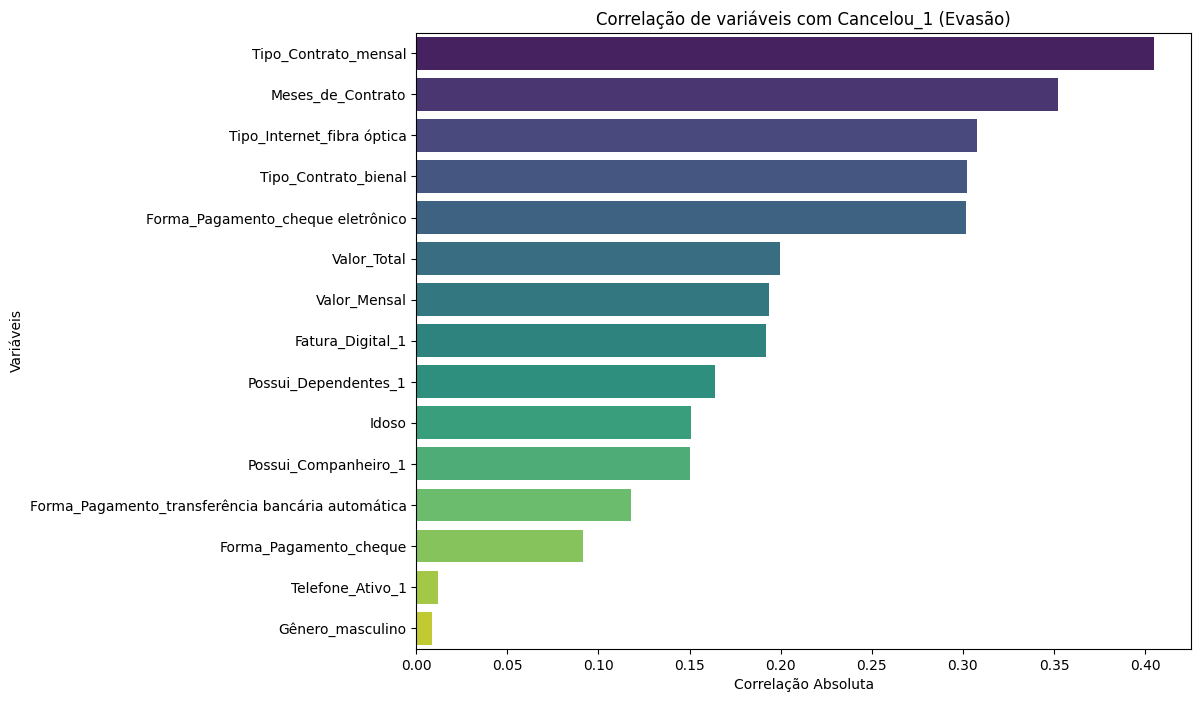

In [100]:
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette="viridis")
plt.title("Correlação de variáveis com Cancelou_1 (Evasão)")
plt.xlabel("Correlação Absoluta")
plt.ylabel("Variáveis")
plt.show()

 Análises Direcionadas

In [101]:
pd.get_dummies(df['Tipo_Contrato'], drop_first=False)

,anual,bienal,mensal
0,True,False,False
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
7038,True,False,False
7039,False,False,True
7040,False,False,True
7041,False,True,False


In [102]:
print([col for col in df_encoded.columns if 'Tipo_Contrato' in col])

['Tipo_Contrato_bienal', 'Tipo_Contrato_mensal']


In [103]:
def get_contract_type(row):
    if 'Tipo_Contrato_Mensal' in row and row['Tipo_Contrato_Mensal'] == 1:
        return 'Mensal'
    elif 'Tipo_Contrato_Bianual' in row and row['Tipo_Contrato_Bianual'] == 1:
        return 'Bianual'
    else:
        return 'Anual'

In [104]:
churn_by_contract_type = df.groupby(['Tipo_Contrato', 'Cancelamento']).size().reset_index(name='Quantidade')

total_by_contract_type = churn_by_contract_type.groupby('Tipo_Contrato')['Quantidade'].transform('sum')

churn_by_contract_type['Percentual'] = churn_by_contract_type['Quantidade'] / total_by_contract_type * 100

print(churn_by_contract_type)

  Tipo_Contrato  Cancelamento  Quantidade  Percentual
0         anual             0        1307   88.730482
1         anual             1         166   11.269518
2        bienal             0        1647   97.168142
3        bienal             1          48    2.831858
4        mensal             0        2220   57.290323
5        mensal             1        1655   42.709677


In [105]:
import plotly.express as px

taxa_churn_contrato = df.groupby(['Tipo_Contrato', 'Cancelamento']).size().reset_index(name='Quantidade')
total_by_contract_type = taxa_churn_contrato.groupby('Tipo_Contrato')['Quantidade'].transform('sum')
taxa_churn_contrato['Percentual'] = taxa_churn_contrato['Quantidade'] / total_by_contract_type * 100

fig_churn_contrato = px.bar(
    taxa_churn_contrato,
    x='Tipo_Contrato',
    y='Percentual',
    color='Cancelamento',
    color_discrete_map={'Não': 'green', 'Sim': 'red'},
    labels={
        'Tipo_Contrato': 'Tipo de Contrato',
        'Percentual': 'Percentual (%)',
        'Cancelamento': 'Churn (Cancelamento)'
    },
    title='📉 Taxa de Churn por Tipo de Contrato na Telecom X',
    text=taxa_churn_contrato['Percentual'].apply(lambda x: f'{x:.1f}%')
)
fig_churn_contrato.update_layout(barmode='stack', yaxis=dict(ticksuffix='%'), bargap=0.5)
fig_churn_contrato.show()

Divisão dos Dados em Treino, Validação e Teste

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4930, 15)
Shape of X_test: (1057, 15)
Shape of y_train: (4930,)
Shape of y_test: (1057,)


Pré-processamento (aplicado somente após a divisão)

In [107]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Identificar colunas categóricas e numéricas
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(exclude=['object', 'category']).columns

# Criar o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar (fit) apenas com os dados de treino
encoder.fit(X_train[categorical_cols])

# Transformar treino, validação e teste
X_train_encoded = pd.DataFrame(
    encoder.transform(X_train[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train.index
)

X_val_encoded = pd.DataFrame(
    encoder.transform(X_val[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_val.index
)

X_test_encoded = pd.DataFrame(
    encoder.transform(X_test[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_test.index
)

# Reconcatenar com as colunas numéricas originais
X_train_final = pd.concat([X_train[numeric_cols].reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_val_final   = pd.concat([X_val[numeric_cols].reset_index(drop=True),   X_val_encoded.reset_index(drop=True)], axis=1)
X_test_final  = pd.concat([X_test[numeric_cols].reset_index(drop=True),  X_test_encoded.reset_index(drop=True)], axis=1)


# Modelagem Preditiva

Normalização / Padronização das variáveis numéricas

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train_final)

# Transformar treino, validação e teste
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_final),
    columns=X_train_final.columns,
    index=X_train_final.index
)

X_val_scaled = pd.DataFrame(
    scaler.transform(X_val_final),
    columns=X_val_final.columns,
    index=X_val_final.index
)


Avaliação de Desempenho dos Modelos

In [109]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from collections import Counter


In [110]:
imputer = SimpleImputer(strategy='median')

X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_final), columns=X_train_final.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_val_final), columns=X_val_final.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

In [111]:
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_final), columns=X_train_final.columns)

In [112]:
X_val_final_imputed = pd.DataFrame(imputer.transform(X_val_final), columns=X_val_final.columns)
X_test_final_imputed = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

In [113]:
print("Distribuição original treino:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_imputed, y_train)
print("Distribuição treino após SMOTE:", Counter(y_train_bal))


Distribuição original treino: Counter({False: 3622, True: 1308})
Distribuição treino após SMOTE: Counter({False: 3622, True: 3622})


In [114]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_bal, y_train_bal)

y_val_pred = rf.predict(X_val_imputed)
print("\n[Matriz de Confusão - Validação | RF]")
print(pd.DataFrame(confusion_matrix(y_val, y_val_pred),
                   index=["Real 0","Real 1"], columns=["Pred 0","Pred 1"]))
print("\n[Classification Report - Validação | RF]")
print(classification_report(y_val, y_val_pred))

y_test_pred = rf.predict(X_test_imputed)
print("\n[Matriz de Confusão - Teste | RF]")
print(pd.DataFrame(confusion_matrix(y_test, y_test_pred),
                   index=["Real 0","Real 1"], columns=["Pred 0","Pred 1"]))
print("\n[Classification Report - Teste | RF]")
print(classification_report(y_test, y_test_pred))


[Matriz de Confusão - Validação | RF]
        Pred 0  Pred 1
Real 0     685      91
Real 1     141     139

[Classification Report - Validação | RF]
              precision    recall  f1-score   support

       False       0.83      0.88      0.86       776
        True       0.60      0.50      0.55       280

    accuracy                           0.78      1056
   macro avg       0.72      0.69      0.70      1056
weighted avg       0.77      0.78      0.77      1056


[Matriz de Confusão - Teste | RF]
        Pred 0  Pred 1
Real 0     676     100
Real 1     138     143

[Classification Report - Teste | RF]
              precision    recall  f1-score   support

       False       0.83      0.87      0.85       776
        True       0.59      0.51      0.55       281

    accuracy                           0.77      1057
   macro avg       0.71      0.69      0.70      1057
weighted avg       0.77      0.77      0.77      1057



In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_final), columns=X_train_final.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_val_final), columns=X_val_final.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_imputed), columns=X_val_imputed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)


In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("KNN Val Score:", knn.score(X_val_scaled, y_val))
print("KNN Test Score:", knn.score(X_test_scaled, y_test))

KNN Val Score: 0.7575757575757576
KNN Test Score: 0.7578051087984863


Matriz de Confusão

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(exclude=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Pipeline com Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

rf_pipeline.fit(X_train, y_train)

print("Pipeline Random Forest definido e treinado.")

Pipeline Random Forest definido e treinado.


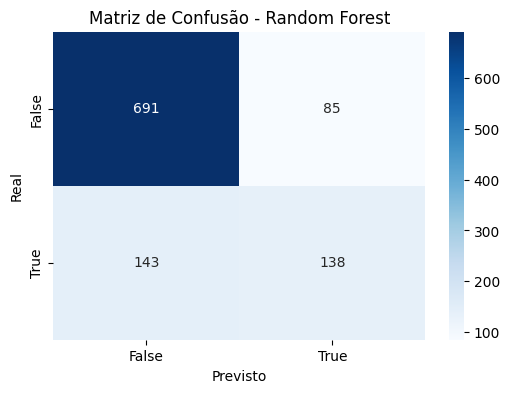

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fazer previsões usando o pipeline treinado
y_pred = rf_pipeline.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()



Treinamento do KNN com normalização + SMOTE

Train (antes): Counter({False: 3622, True: 1308})
Train (depois SMOTE): Counter({False: 3622, True: 3622})

[Matriz de Confusão - Validação | KNN]
        Pred 0  Pred 1
Real 0     559     217
Real 1      98     182

[Classification Report - Validação | KNN]
              precision    recall  f1-score   support

       False       0.85      0.72      0.78       776
        True       0.46      0.65      0.54       280

    accuracy                           0.70      1056
   macro avg       0.65      0.69      0.66      1056
weighted avg       0.75      0.70      0.72      1056



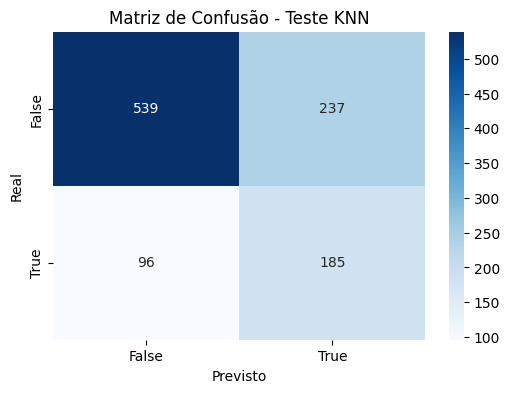


[Classification Report - Teste | KNN]
              precision    recall  f1-score   support

       False       0.85      0.69      0.76       776
        True       0.44      0.66      0.53       281

    accuracy                           0.68      1057
   macro avg       0.64      0.68      0.65      1057
weighted avg       0.74      0.68      0.70      1057



In [119]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_final), columns=X_train_final.columns)
X_val_imputed   = pd.DataFrame(imputer.transform(X_val_final), columns=X_val_final.columns)
X_test_imputed  = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val_imputed), columns=X_val_imputed.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)

print("Train (antes):", Counter(y_train))
smote_knn = SMOTE(random_state=42)
X_train_bal_knn, y_train_bal_knn = smote_knn.fit_resample(X_train_scaled, y_train)
print("Train (depois SMOTE):", Counter(y_train_bal_knn))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal_knn, y_train_bal_knn)

y_val_pred_knn = knn.predict(X_val_scaled)
print("\n[Matriz de Confusão - Validação | KNN]")
print(pd.DataFrame(confusion_matrix(y_val, y_val_pred_knn),
                   index=["Real 0","Real 1"], columns=["Pred 0","Pred 1"]))
print("\n[Classification Report - Validação | KNN]")
print(classification_report(y_val, y_val_pred_knn))

y_test_pred_knn = knn.predict(X_test_scaled)
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Teste KNN")
plt.show()

print("\n[Classification Report - Teste | KNN]")
print(classification_report(y_test, y_test_pred_knn))


In [120]:
y_pred_train_rf = rf_pipeline.predict(X_train)

y_pred_train_knn = knn.predict(X_train_scaled)

print("Métricas de Avaliação no Conjunto de TREINO - Random Forest:")
print(classification_report(y_train, y_pred_train_rf))

print("\nMétricas de Avaliação no Conjunto de TREINO - KNN:")
print(classification_report(y_train, y_pred_train_knn))

Métricas de Avaliação no Conjunto de TREINO - Random Forest:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3622
        True       0.99      1.00      1.00      1308

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930


Métricas de Avaliação no Conjunto de TREINO - KNN:
              precision    recall  f1-score   support

       False       0.95      0.80      0.87      3622
        True       0.62      0.87      0.72      1308

    accuracy                           0.82      4930
   macro avg       0.78      0.84      0.80      4930
weighted avg       0.86      0.82      0.83      4930



Comparativa entre Modelos

In [121]:
print(rf_pipeline.feature_names_in_)

['Idoso' 'Meses_de_Contrato' 'Valor_Mensal' 'Valor_Total'
 'Gênero_masculino' 'Possui_Companheiro_1' 'Possui_Dependentes_1'
 'Telefone_Ativo_1' 'Tipo_Internet_fibra óptica' 'Tipo_Contrato_bienal'
 'Tipo_Contrato_mensal' 'Fatura_Digital_1' 'Forma_Pagamento_cheque'
 'Forma_Pagamento_cheque eletrônico'
 'Forma_Pagamento_transferência bancária automática']


In [122]:
X_test_df = pd.DataFrame(X_test, columns=X_test_final.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coef_LogReg': logreg.coef_[0]
}).sort_values(by='Coef_LogReg', key=abs, ascending=False)

print("Top 10 variáveis mais relevantes (Logística):")
print(coef_df.head(10))

Top 10 variáveis mais relevantes (Logística):
                              Feature  Coef_LogReg
1                   Meses_de_Contrato    -1.396750
3                         Valor_Total     0.573973
10               Tipo_Contrato_mensal     0.426055
8          Tipo_Internet_fibra óptica     0.353362
2                        Valor_Mensal     0.314415
9                Tipo_Contrato_bienal    -0.308366
7                    Telefone_Ativo_1    -0.242780
13  Forma_Pagamento_cheque eletrônico     0.238794
11                   Fatura_Digital_1     0.221811
6                Possui_Dependentes_1    -0.103174


In [124]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_scaled, y_train)

rf_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance_RF': rf.feature_importances_
}).sort_values(by='Importance_RF', ascending=False)

print("\nTop 10 variáveis mais importantes (Random Forest):")
print(rf_importances.head(10))



Top 10 variáveis mais importantes (Random Forest):
                              Feature  Importance_RF
3                         Valor_Total       0.236931
2                        Valor_Mensal       0.231682
1                   Meses_de_Contrato       0.190727
10               Tipo_Contrato_mensal       0.081386
8          Tipo_Internet_fibra óptica       0.042953
13  Forma_Pagamento_cheque eletrônico       0.039231
4                    Gênero_masculino       0.028436
11                   Fatura_Digital_1       0.027788
5                Possui_Companheiro_1       0.022114
0                               Idoso       0.021126


In [125]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
knn_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance_KNN': knn_result.importances_mean
}).sort_values(by='Importance_KNN', ascending=False)

print("\nTop 10 variáveis mais importantes (KNN):")
print(knn_importances.head(10))


Top 10 variáveis mais importantes (KNN):
                       Feature  Importance_KNN
8   Tipo_Internet_fibra óptica        0.023368
3                  Valor_Total        0.015043
10        Tipo_Contrato_mensal        0.012110
1            Meses_de_Contrato        0.011353
0                        Idoso        0.009366
11            Fatura_Digital_1        0.004257
2                 Valor_Mensal        0.003500
6         Possui_Dependentes_1        0.000095
5         Possui_Companheiro_1       -0.000284
7             Telefone_Ativo_1       -0.000378


In [126]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)

svm_coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coef_SVM': svm.coef_[0]
}).sort_values(by='Coef_SVM', key=abs, ascending=False)

print("\nTop 10 variáveis mais relevantes (SVM linear):")
print(svm_coef_df.head(10))



Top 10 variáveis mais relevantes (SVM linear):
                              Feature  Coef_SVM
8          Tipo_Internet_fibra óptica  0.595483
1                   Meses_de_Contrato -0.471101
3                         Valor_Total -0.380801
2                        Valor_Mensal  0.206758
13  Forma_Pagamento_cheque eletrônico  0.200665
10               Tipo_Contrato_mensal  0.193954
7                    Telefone_Ativo_1 -0.115065
11                   Fatura_Digital_1  0.109772
9                Tipo_Contrato_bienal  0.083591
0                               Idoso  0.068242


In [127]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
knn_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance_KNN': knn_result.importances_mean
}).sort_values(by='Importance_KNN', ascending=False)

print("\nTop 10 variáveis mais importantes (KNN):")
print(knn_importances.head(10))


Top 10 variáveis mais importantes (KNN):
                       Feature  Importance_KNN
8   Tipo_Internet_fibra óptica        0.023368
3                  Valor_Total        0.015043
10        Tipo_Contrato_mensal        0.012110
1            Meses_de_Contrato        0.011353
0                        Idoso        0.009366
11            Fatura_Digital_1        0.004257
2                 Valor_Mensal        0.003500
6         Possui_Dependentes_1        0.000095
5         Possui_Companheiro_1       -0.000284
7             Telefone_Ativo_1       -0.000378


In [128]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)

svm_coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coef_SVM': svm.coef_[0]
}).sort_values(by='Coef_SVM', key=abs, ascending=False)

print("\nTop 10 variáveis mais relevantes (SVM linear):")
print(svm_coef_df.head(10))

top_features = coef_df.head(10)['Feature'].tolist()

importance_plot_df = pd.DataFrame({
    'Feature': top_features,
    'LogReg': coef_df.set_index('Feature').loc[top_features, 'Coef_LogReg'].abs(),
    'RF': rf_importances.set_index('Feature').loc[top_features, 'Importance_RF'],
    'KNN': knn_importances.set_index('Feature').loc[top_features, 'Importance_KNN'],
    'SVM': svm_coef_df.set_index('Feature').loc[top_features, 'Coef_SVM'].abs()
}).reset_index(drop=True)



Top 10 variáveis mais relevantes (SVM linear):
                              Feature  Coef_SVM
8          Tipo_Internet_fibra óptica  0.595483
1                   Meses_de_Contrato -0.471101
3                         Valor_Total -0.380801
2                        Valor_Mensal  0.206758
13  Forma_Pagamento_cheque eletrônico  0.200665
10               Tipo_Contrato_mensal  0.193954
7                    Telefone_Ativo_1 -0.115065
11                   Fatura_Digital_1  0.109772
9                Tipo_Contrato_bienal  0.083591
0                               Idoso  0.068242


## Análise

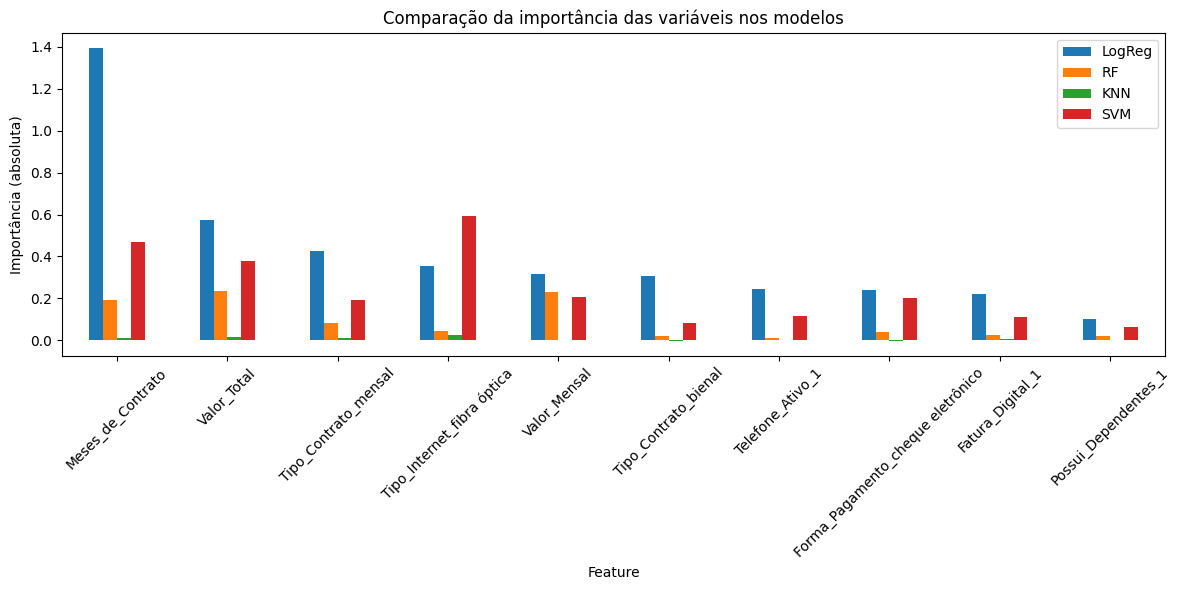

In [129]:
importance_plot_df.set_index('Feature').plot(kind='bar', figsize=(12,6))
plt.ylabel("Importância (absoluta)")
plt.title("Comparação da importância das variáveis nos modelos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# *Conclusão*

Carreguei o arquivo CSV so projeto anterior e comecei as avaliações.

para o tratamento de dados e pré processamento comecei a análise subistituindo "sem internet" por "não" e que significa a ausência do serviço.


já no enconding o tratamento dos dados foi para transformar as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilizaremos um método de codificação adequado, como o one-hot encoding.


Transformei as variáveis categóricas em colunas binárias (dummies), descartando uma categoria para evitar redundância, preparando os dados para o modelo preditivo.


No calculo da proporção de evasão dos clientes avaliei se existe um desiquilibrio entre as classes, o que pode impacter modelos e análises de resultado.


A evasão na sua maior parte deve-se ao valor da cobrança mensal.

o segundo grande motivo do cancelamento se dá por conta dos clientes idosos, existe uma maior evasão entre eles.


quanto maior o tempo de permanência o cliente tem menos chance de cancelar o produto.

E os que pagam mais ao longo do tempo tendem a permanecer também.

para que tenha melhorias sugiro que melhore os planos oferecidos aos clientes, os contratos também.


Os dados foram dividios em treinamento, validação e teste.

Conjunto de Treinamento: Usado para ajustar o modelo, permitindo que ele aprenda os padrões dos dados.


Conjunto de Validação: Utilizado durante o projeto para comparar diferentes modelos e ajustar seus hiperparâmetros. Ele permite avaliar o desempenho do modelo em dados "novos" para o treinamento, sem "contaminar" o conjunto de teste final.


Conjunto de Teste: É mantido completamente separado e intocado durante todo o processo de desenvolvimento e ajuste do modelo. Ele é usado apenas uma vez, no final do projeto, para uma avaliação imparcial e final do desempenho do modelo, simulando como ele se comportaria em dados do mundo real que nunca foram vistos

As técnicas de balanceamento, como oversampling (SMOTE) ou undersampling (NearMiss), visam equilibrar a distribuição das classes da variável alvo para melhorar o aprendizado do modelo, especialmente para a classe minoritária.

Random Forest (sem normalização)

Usaremos os conjuntos já codificados: X_train_final, X_val_final, X_test_final (do passo de encoding). Não se aplica SMOTE em validação/teste.

KNN – K Vizinhos Mais Próximos (com normalização)

Classifica os clientes com base na distância dos vizinhos mais próximos.


Requer normalização, pois é altamente sensível à escala das variáveis.


Simples e intuitivo, mas pode ter performance inferior com dados desbalanceados.


Apresentou métricas medianas e sinal de underfitting.

# **Análise de Importância das Variáveis**

O gráfico abaixo exibe as variáveis mais relevantes identificadas pelo modelo Regressão Logística, treinado com dados normalizados, para prever a evasão de clientes.


As variáveis posicionadas no topo do gráfico apresentam maior influência nas decisões do modelo, com base na magnitude dos coeficientes. Isso significa que pequenas variações nessas variáveis têm um impacto significativo na probabilidade de um cliente cancelar os serviços.

O modelo Regressão Logística apresentou o melhor desempenho entre os avaliados, alcançando acurácia de aproximadamente 79,96%, além de melhores resultados nas métricas de Precisão (65,44%), Recall (52,14%) e F1-Score (58,04%), essenciais para identificar corretamente clientes propensos à evasão.

O modelo Random Forest, apesar de ter boa acurácia (78,96%), apresentou desempenho inferior nas métricas de precisão e recall, mostrando-se menos eficaz para o problema específico.
As variáveis com maior impacto na previsão incluem:
Tempo de Contrato: clientes com menor tempo tendem a evadir mais.

Valor Mensal: valores maiores influenciam negativamente a permanência.
Serviços adicionais como segurança online, backup e suporte técnico mostraram relevância na modelagem.

Recomendações Estratégicas:

Oferecer pacotes descontos progressivos para aumentar o tempo de fidelização e reduzir a taxa de cancelamento.

monitorar contiuamente e assim evitar a evasão.